In [1]:
import numpy as np
import pandas as pd
from scipy import stats

pd.set_option('display.precision', 3)
np.set_printoptions(precision=3)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import statsmodels.formula.api as smf
import statsmodels.api as sm

/Users/shonakamura/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/Users/shonakamura/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
beer = pd.read_csv('8-1-1-beer.csv')
beer.head()

,beer,temperature
0,45.3,20.5
1,59.3,25.0
2,40.4,10.0
3,38.0,26.9
4,37.0,15.8


<AxesSubplot:xlabel='temperature', ylabel='beer'>

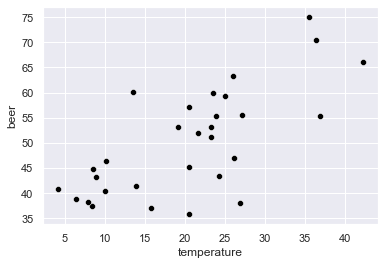

In [3]:
sns.scatterplot(x='temperature', y='beer', data=beer, color='black')

In [4]:
x = beer['temperature']
y = beer['beer']

In [5]:
cov_mat = np.cov(x, y, ddof=0)
cov_mat

array([[ 93.963,  71.922],
       [ 71.922, 109.237]])

In [6]:
x_bar = np.mean(x)
y_bar = np.mean(y)

cov_xy = cov_mat[0, 1]
s2_x = cov_mat[0, 0]

beta_1 = cov_xy / s2_x
beta_0 = y_bar - beta_1 * x_bar

print('切片:', round(beta_0, 3))
print('気温の係数:', round(beta_1,3))

切片: 34.61
気温の係数: 0.765


In [7]:
lm_model = smf.ols(formula='beer ~ temperature', data=beer).fit()

In [8]:
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   beer   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     28.45
Date:                Mon, 22 May 2023   Prob (F-statistic):           1.11e-05
Time:                        14:33:45   Log-Likelihood:                -102.45
No. Observations:                  30   AIC:                             208.9
Df Residuals:                      28   BIC:                             211.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      34.6102      3.235     10.699      0.000      27.984      41.237
temperature     0.7654      0.144      5.334      0.000       0.471       1.059
==============================================================================
Omnibus:                        0.587   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.746   Jarque-Bera (JB):                0.290
Skew:                          -0.240   Prob(JB):                        0.865
Kurtosis:                       2.951   Cond. No.                         52.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
null_model = smf.ols(formula='beer ~ 1', data=beer).fit()

In [10]:
round(null_model.aic, 3)

227.942

In [11]:
round(lm_model.aic, 3)

208.909

In [12]:
round(lm_model.llf, 3)

-102.455

In [13]:
lm_model.df_model

1.0

In [14]:
round(-2 * (lm_model.llf - (lm_model.df_model + 1)), 3)

208.909

In [15]:
lm_model.predict()

array([50.301, 53.746, 42.264, 55.2  , 46.704, 37.825, 44.943, 54.511,
       52.445, 41.116, 54.664, 49.23 , 53.21 , 52.445, 41.04 , 52.598,
       45.25 , 61.783, 55.43 , 50.301, 42.418, 50.301, 51.143, 40.657,
       66.911, 52.904, 62.854, 41.423, 62.472, 39.509])

In [16]:
lm_model.predict(pd.DataFrame({'temperature':[0]}))

0    34.61
dtype: float64

In [17]:
lm_model.params

Intercept      34.610
temperature     0.765
dtype: float64

In [18]:
lm_model.predict(pd.DataFrame({'temperature':[20]}))

0    49.919
dtype: float64

In [19]:
beta0 = lm_model.params[0]
beta1 = lm_model.params[1]
temperature = 20

round(beta0 + beta1 * temperature, 3)

49.919

In [20]:
pred_interval = lm_model.get_prediction(
    pd.DataFrame({'temperature':[20]}))

pred_frame = pred_interval.summary_frame(alpha=0.05)
pred_frame

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,49.919,1.392,47.067,52.77,34.053,65.785


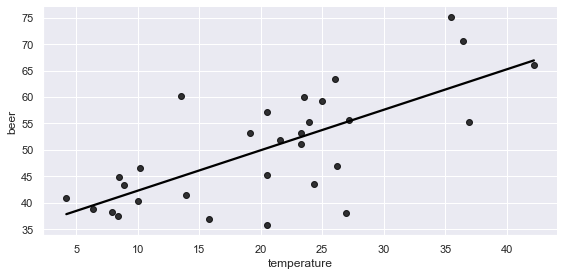

In [21]:
sns.lmplot(x='temperature', y='beer', data=beer, scatter_kws={'color': 'black'},
           line_kws={'color': 'black'}, ci=None, height=4, aspect=2)

In [22]:
pred_all = lm_model.get_prediction()
pred_frame_all = pred_all.summary_frame(alpha=0.05)

In [23]:
pred_graph = pd.concat([beer.temperature, pred_frame_all], axis=1)
pred_graph = pred_graph.sort_values("temperature")

<AxesSubplot:xlabel='temperature', ylabel='beer'>

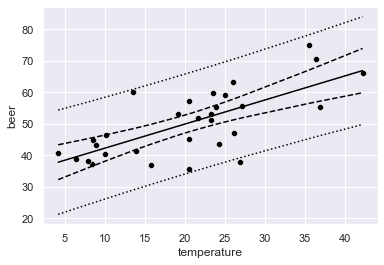

In [24]:
sns.scatterplot(x='temperature', y='beer', data=beer, color='black')

sns.lineplot(x='temperature', y='mean', data=pred_graph, color='black')

sns.lineplot(x='temperature', y='mean_ci_lower', data=pred_graph, color='black', linestyle='dashed')

sns.lineplot(x='temperature', y='mean_ci_upper', data=pred_graph, color='black', linestyle='dashed')

sns.lineplot(x='temperature', y='obs_ci_lower', data=pred_graph, color='black', linestyle='dotted')

sns.lineplot(x='temperature', y='obs_ci_upper', data=pred_graph, color='black', linestyle='dotted')

In [25]:
import numpy as np
import pandas as pd
from scipy import stats

pd.set_option('display.precision', 3)
np.set_printoptions(precision=3)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import statsmodels.formula.api as smf
import statsmodels.api as sm

In [26]:
beer = pd.read_csv('8-1-1-beer.csv')

lm_model = smf.ols(formula='beer ~ temperature', data=beer).fit()

In [27]:
e = lm_model.resid
e.head()

0    -5.001
1     5.554
2    -1.864
3   -17.200
4    -9.704
dtype: float64

In [28]:
beta0 = lm_model.params[0]
beta1 = lm_model.params[1]

y_hat = beta0 + beta1 * beer.temperature
y_hat.head()

0    50.301
1    53.746
2    42.264
3    55.200
4    46.704
Name: temperature, dtype: float64

In [29]:
(beer.beer - y_hat).head()

0    -5.001
1     5.554
2    -1.864
3   -17.200
4    -9.704
dtype: float64

In [30]:
y = beer.beer
y_bar = np.mean(y)
y_hat = lm_model.predict()

round(np.sum((y_hat - y_bar)**2) / np.sum((y - y_bar)**2), 3)

0.504

In [31]:
round(np.sum((y_hat - y_bar)**2) + sum(e**2), 3)

3277.115

In [32]:
round(np.sum((y - y_bar)**2), 3)

3277.115

In [33]:
round(1 - np.sum(e**2) / np.sum((y - y_bar)**2), 3)

0.504

In [34]:
n = len(beer.beer)
d = 1
r2_adj = 1 - ((np.sum(e**2) / (n - d - 1)) / (np.sum((y - y_bar)**2) / (n - 1)))
round(r2_adj, 3)

0.486

<AxesSubplot:ylabel='Count'>

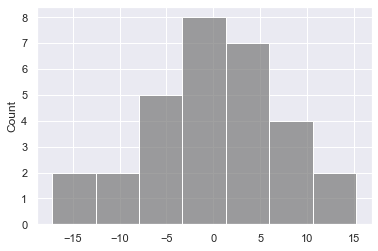

In [35]:
sns.histplot(e, color='gray')

<AxesSubplot:>

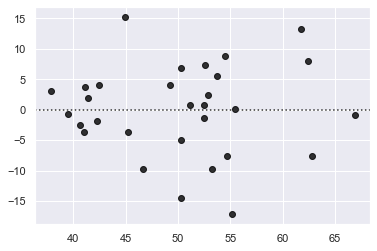

In [36]:
sns.residplot(x=lm_model.fittedvalues, y=e, color='black')

/Users/shonakamura/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


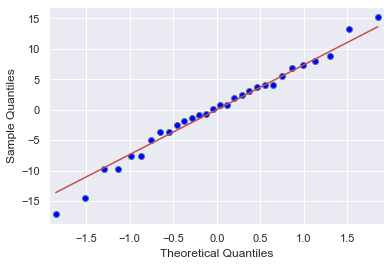

In [37]:
fig = sm.qqplot(e, line='s')

In [38]:
e_sort = e.sort_values()
e_sort.head()

3    -17.200
21   -14.501
12    -9.710
4     -9.704
10    -7.664
dtype: float64

In [39]:
round(1 / 31, 3)

0.032

In [40]:
nobs = len(e_sort)
cdf = np.arange(1, nobs + 1) / (nobs + 1)
cdf

array([0.032, 0.065, 0.097, 0.129, 0.161, 0.194, 0.226, 0.258, 0.29 ,
       0.323, 0.355, 0.387, 0.419, 0.452, 0.484, 0.516, 0.548, 0.581,
       0.613, 0.645, 0.677, 0.71 , 0.742, 0.774, 0.806, 0.839, 0.871,
       0.903, 0.935, 0.968])

In [41]:
ppf = stats.norm.ppf(cdf)
ppf

array([-1.849, -1.518, -1.3  , -1.131, -0.989, -0.865, -0.753, -0.649,
       -0.552, -0.46 , -0.372, -0.287, -0.204, -0.122, -0.04 ,  0.04 ,
        0.122,  0.204,  0.287,  0.372,  0.46 ,  0.552,  0.649,  0.753,
        0.865,  0.989,  1.131,  1.3  ,  1.518,  1.849])

<AxesSubplot:>

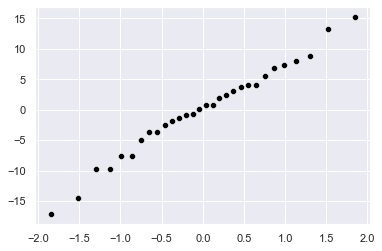

In [42]:
sns.scatterplot(x=ppf, y=e_sort, color='black')

In [43]:
import numpy as np
import pandas as pd
from scipy import stats

pd.set_option('display.precision', 3)
np.set_printoptions(precision=3)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import statsmodels.formula.api as smf
import statsmodels.api as sm

In [44]:
weather = [
    'cloudy', 'cloudy',
    'rainy', 'rainy',
    'sunny', 'sunny'
]

beer = [6, 8, 2, 4, 10, 12]

weather_beer = pd.DataFrame({
    'beer': beer,
    'weather': weather
})

weather_beer

,beer,weather
0,6,cloudy
1,8,cloudy
2,2,rainy
3,4,rainy
4,10,sunny
5,12,sunny


<AxesSubplot:xlabel='weather', ylabel='beer'>

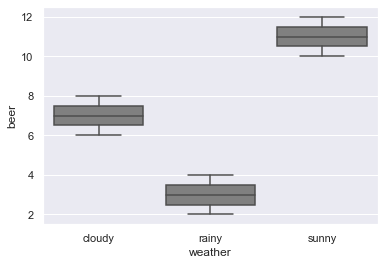

In [45]:
sns.boxplot(x='weather', y='beer', data=weather_beer, color='gray')

In [46]:
y = weather_beer.beer.to_numpy()
y

array([ 6,  8,  2,  4, 10, 12])

In [47]:
y_bar = np.mean(y)
y_bar

7.0

In [48]:
y_bar_j = weather_beer.groupby('weather').mean()
y_bar_j

,beer
weather,
cloudy,7.0
rainy,3.0
sunny,11.0


In [49]:
n_j = 2

effect = np.repeat(y_bar_j.beer, n_j)
effect

weather
cloudy     7.0
cloudy     7.0
rainy      3.0
rainy      3.0
sunny     11.0
sunny     11.0
Name: beer, dtype: float64

In [50]:
ss_b = np.sum((effect - y_bar) ** 2)
ss_b

64.0

In [51]:
resid = y - effect
resid

weather
cloudy   -1.0
cloudy    1.0
rainy    -1.0
rainy     1.0
sunny    -1.0
sunny     1.0
Name: beer, dtype: float64

In [52]:
ss_w = np.sum(resid ** 2)
ss_w

6.0

In [54]:
df_b = 2
df_w = 3

In [55]:
sigma_b = ss_b / df_b
sigma_b

32.0

In [56]:
sigma_w = ss_w / df_w
sigma_w

2.0

In [57]:
f_ratio = sigma_b / sigma_w
f_ratio

16.0

In [58]:
p_value = 1 - stats.f.cdf(x=f_ratio, dfn=df_b, dfd=df_w)
round(p_value, 3)

0.025

In [59]:
anova_model = smf.ols(formula='beer ~ weather', data=weather_beer).fit()

In [60]:
sm.stats.anova_lm(anova_model, typ=2)

,sum_sq,df,F,PR(>F)
weather,64.0,2.0,16.0,0.025
Residual,6.0,3.0,NaN,NaN


In [61]:
np.sum((y - y_bar)**2)

70.0

In [62]:
anova_model.params

Intercept           7.0
weather[T.rainy]   -4.0
weather[T.sunny]    4.0
dtype: float64

In [63]:
fitted = anova_model.fittedvalues
fitted

0     7.0
1     7.0
2     3.0
3     3.0
4    11.0
5    11.0
dtype: float64

In [64]:
anova_model.resid

0   -1.0
1    1.0
2   -1.0
3    1.0
4   -1.0
5    1.0
dtype: float64

In [65]:
beer = pd.read_csv('8-1-1-beer.csv')

lm_model = smf.ols(formula='beer ~ temperature', data=beer).fit()

In [66]:
print('モデルの自由度：', lm_model.df_model)
print('残差の自由度：', lm_model.df_resid)

モデルの自由度： 1.0
残差の自由度： 28.0


In [67]:
y = beer.beer

effect = lm_model.fittedvalues

resid = lm_model.resid

y_bar = np.mean(y)
ss_model = np.sum((effect - y_bar) ** 2)
sigma_model = ss_model / lm_model.df_model

ss_resid = np.sum((resid) ** 2)
sigma_resid = ss_resid / lm_model.df_resid

f_value_lm = sigma_model / sigma_resid
round(f_value_lm, 3)

28.447

In [71]:
print(sm.stats.anova_lm(lm_model, typ=2))

               sum_sq    df       F     PR(>F)
temperature  1651.532   1.0  28.447  1.115e-05
Residual     1625.582  28.0     NaN        NaN


In [72]:
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   beer   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     28.45
Date:                Mon, 22 May 2023   Prob (F-statistic):           1.11e-05
Time:                        14:50:09   Log-Likelihood:                -102.45
No. Observations:                  30   AIC:                             208.9
Df Residuals:                      28   BIC:                             211.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      34.6102      3.235     10.699      0.000      27.984      41.237
temperature     0.7654      0.144      5.334      0.000       0.471       1.059
==============================================================================
Omnibus:                        0.587   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.746   Jarque-Bera (JB):                0.290
Skew:                          -0.240   Prob(JB):                        0.865
Kurtosis:                       2.951   Cond. No.                         52.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
print('総平方和：', round(np.sum((y - y_bar)**2), 3))
print('SS_B + SS_W:', round(ss_model + ss_resid, 3))

総平方和： 3277.115
SS_B + SS_W: 3277.115


In [74]:
round(np.sum((y - y_bar)**2) - np.sum((resid) ** 2), 3)

1651.532

In [76]:
import numpy as np
import pandas as pd
from scipy import stats

pd.set_option('display.precision', 3)
np.set_printoptions(precision=3)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import statsmodels.formula.api as smf
import statsmodels.api as sm

In [77]:
brand_1 = pd.read_csv('8-4-1-brand-1.csv')
brand_1.head()

,sales,brand,local_population
0,348.0,A,215.1
1,169.7,A,152.0
2,143.7,A,107.7
3,295.7,A,371.5
4,281.2,A,184.7


In [78]:
brand_1.brand.value_counts()

A    15
B    15
Name: brand, dtype: int64

In [79]:
brand_1.groupby('brand').mean()

,sales,local_population
brand,,
A,283.707,268.973
B,403.927,437.933


<AxesSubplot:xlabel='brand', ylabel='sales'>

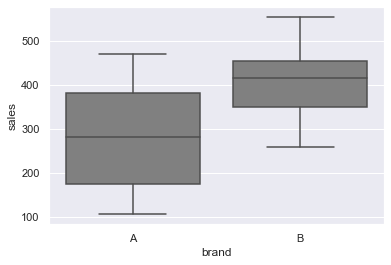

In [80]:
sns.boxplot(x='brand', y='sales', data=brand_1, color='gray')

In [82]:
lm_dame_1 = smf.ols('sales ~ brand', brand_1).fit()
lm_dame_1.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,283.7067,26.602,10.665,0.000,229.214,338.199
brand[T.B],120.2200,37.622,3.196,0.003,43.156,197.284


In [83]:
sm.stats.anova_lm(lm_dame_1, typ=1).round(3)

,df,sum_sq,mean_sq,F,PR(>F)
brand,1.0,108396.363,108396.363,10.211,0.003
Residual,28.0,297230.019,10615.358,NaN,NaN


In [84]:
lm_model_1 = smf.ols('sales ~ brand + local_population', data=brand_1).fit()
lm_model_1.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,101.0946,31.535,3.206,0.003,36.389,165.800
brand[T.B],5.5093,28.768,0.192,0.850,-53.518,64.537
local_population,0.6789,0.100,6.790,0.000,0.474,0.884


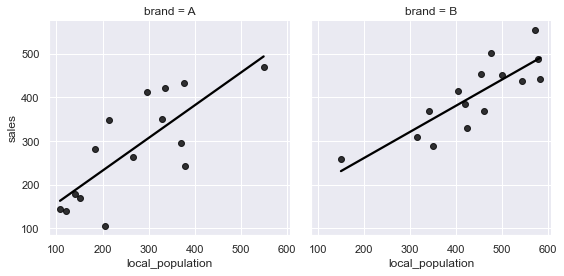

In [85]:
sns.lmplot(x='local_population', y='sales', data=brand_1, col='brand', scatter_kws={'color': 'black'},
           line_kws={'color': 'black'}, ci=None, height=4, aspect=1)

In [86]:
sm.stats.anova_lm(lm_model_1, typ=1).round(3)

,df,sum_sq,mean_sq,F,PR(>F)
brand,1.0,108396.363,108396.363,26.658,0.0
local_population,1.0,187442.822,187442.822,46.098,0.0
Residual,27.0,109787.197,4066.192,NaN,NaN


In [87]:
mod_null = smf.ols('sales ~ 1', brand_1).fit()
resid_sq_null = np.sum(mod_null.resid ** 2)
round(resid_sq_null, 3)

405626.382

In [88]:
resid_sq_brand = np.sum(lm_dame_1.resid ** 2)
round(resid_sq_brand, 3)

297230.019

In [89]:
round(resid_sq_null - resid_sq_brand, 3)

108396.363

In [90]:
resid_sq_all = np.sum(lm_model_1.resid ** 2)
round(resid_sq_all, 3)

109787.197

In [91]:
round(resid_sq_brand - resid_sq_all, 3)

187442.822

In [92]:
sm.stats.anova_lm(lm_model_1, typ=1).round(3)

,df,sum_sq,mean_sq,F,PR(>F)
brand,1.0,108396.363,108396.363,26.658,0.0
local_population,1.0,187442.822,187442.822,46.098,0.0
Residual,27.0,109787.197,4066.192,NaN,NaN


In [93]:
lm_model_pop = smf.ols('sales ~ local_population', data=brand_1).fit()
resid_sq_pop = np.sum(lm_model_pop.resid ** 2)
round(resid_sq_pop, 3)

109936.322

In [94]:
round(resid_sq_pop - resid_sq_all, 3)

149.125

In [95]:
sm.stats.anova_lm(lm_model_1, typ=2).round(3)

,sum_sq,df,F,PR(>F)
brand,149.125,1.0,0.037,0.85
local_population,187442.822,1.0,46.098,0.00
Residual,109787.197,27.0,NaN,NaN


In [96]:
np.round(lm_model_1.compare_f_test(lm_model_pop), 3)

array([0.037, 0.85 , 1.   ])

In [97]:
brand_2 = pd.read_csv('8-4-2-brand-2.csv')
brand_2.head()

,sales,brand,local_population
0,385.8,A,265.6
1,473.0,A,386.1
2,451.6,A,522.7
3,556.9,A,530.5
4,423.8,A,397.8


In [98]:
lm_dame_2 = smf.ols('sales ~ brand + local_population', brand_2).fit()
sm.stats.anova_lm(lm_dame_2, typ=2).round(3)

,sum_sq,df,F,PR(>F)
brand,34.275,1.0,0.007,0.933
local_population,484195.711,1.0,100.427,0.000
Residual,226604.693,47.0,NaN,NaN


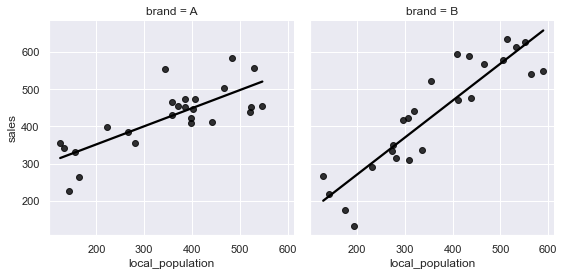

In [99]:
sns.lmplot(x='local_population', y='sales', data=brand_2, col='brand', scatter_kws={'color': 'black'},
          line_kws={'color': 'black'}, ci=None, height=4, aspect=1)

In [100]:
lm_model_2 = smf.ols('sales ~ brand * local_population', data=brand_2).fit()
lm_model_2.params

Intercept                      254.524
brand[T.B]                    -182.924
local_population                 0.486
brand[T.B]:local_population      0.508
dtype: float64

In [101]:
sm.stats.anova_lm(lm_model_2, typ=2).round(3)

,sum_sq,df,F,PR(>F)
brand,34.275,1.0,0.009,0.924
local_population,484195.711,1.0,130.689,0.000
brand:local_population,56176.608,1.0,15.163,0.000
Residual,170428.085,46.0,NaN,NaN


In [102]:
resid_sq_full = np.sum(lm_model_2.resid ** 2)
round(resid_sq_full, 3)

170428.085

In [103]:
mod_non_brand = smf.ols('sales ~ local_population + brand:local_population', data=brand_2).fit()
resid_sq_non_brand = np.sum(mod_non_brand.resid ** 2)
round(resid_sq_non_brand, 3)

220745.808

In [104]:
round(resid_sq_non_brand - resid_sq_full, 3)

50317.723

In [105]:
sm.stats.anova_lm(lm_model_2, typ=3).round(3)

,sum_sq,df,F,PR(>F)
Intercept,195523.067,1.0,52.773,0.000
brand,50317.723,1.0,13.581,0.001
local_population,100639.827,1.0,27.164,0.000
brand:local_population,56176.608,1.0,15.163,0.000
Residual,170428.085,46.0,NaN,NaN


In [106]:
print('交互作用なしモデルのAIC', round(lm_dame_2.aic, 3))
print('交互作用ありモデルのAIC', round(lm_model_2.aic, 3))

交互作用なしモデルのAIC 568.841
交互作用ありモデルのAIC 556.596


In [107]:
lm_model_2.params

Intercept                      254.524
brand[T.B]                    -182.924
local_population                 0.486
brand[T.B]:local_population      0.508
dtype: float64

In [108]:
Intercept = lm_model_2.params[0]
coef_brand_B = lm_model_2.params[1]
coef_local_population = lm_model_2.params[2]
Interaction = lm_model_2.params[3]

In [109]:
lm_model_2.predict(pd.DataFrame({'brand':['A'], 'local_population':[0]}))

0    254.524
dtype: float64

In [110]:
pred_1 = Intercept
round(pred_1, 3)

254.524

In [111]:
lm_model_2.predict(pd.DataFrame({'brand':['A'], 'local_population':[150]}))

0    327.413
dtype: float64

In [112]:
pred_3 = Intercept + coef_local_population * 150
round(pred_3, 3)

327.413

In [113]:
lm_model_2.predict(pd.DataFrame({'brand':['B'], 'local_population':[150]}))

0    220.679
dtype: float64

In [114]:
pred_4 = Intercept + coef_brand_B + (coef_local_population + Interaction) * 150
round(pred_4, 3)

220.679

In [115]:
brand_3 = pd.read_csv('8-4-3-brand-3.csv')
brand_3.head()

,sales,brand,local_population
0,385.8,0.0,265.6
1,473.0,0.0,386.1
2,451.6,0.0,522.7
3,556.9,0.0,530.5
4,423.8,0.0,397.8


In [116]:
brand_3.brand.value_counts()

0.0     25
99.0    25
Name: brand, dtype: int64

In [117]:
lm_model_3 = smf.ols('sales ~ brand * local_population', data=brand_3).fit()
lm_model_3.params

Intercept                 254.524
brand                      -1.848
local_population            0.486
brand:local_population      0.005
dtype: float64

In [118]:
lm_model_3_2 = smf.ols('sales ~ C(brand) * local_population', data=brand_3).fit()
lm_model_3_2.params

Intercept                            254.524
C(brand)[T.99.0]                    -182.924
local_population                       0.486
C(brand)[T.99.0]:local_population      0.508
dtype: float64

In [119]:
from patsy import dmatrix
dmatrix('brand * local_population', brand_2)

DesignMatrix with shape (50, 4)
  Intercept  brand[T.B]  local_population  brand[T.B]:local_population
          1           0             265.6                          0.0
          1           0             386.1                          0.0
          1           0             522.7                          0.0
          1           0             530.5                          0.0
          1           0             397.8                          0.0
          1           0             142.3                          0.0
          1           0             398.6                          0.0
          1           0             222.7                          0.0
          1           0             466.3                          0.0
          1           0             547.3                          0.0
          1           0             357.4                          0.0
          1           0             401.8                          0.0
          1           0             132.5    